In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed, state-level information on the several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above.

Don't forget to apply the most suitable missing-value-filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions (1-4) after you handle the missing values.

To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

Answer the following questions as you work through this assignment, and then submit a link to your Notebook.

Derive the descriptive statistics of the data and discuss the points you find remarkable.

Choose a state (such as California) and draw a line graph of its total revenues and total expenditures over the years. How do these two variables evolve during these years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

In your chosen state, in which of the lessons are the students more successful—math or reading?

What are the distributions of the math and reading scores in the sample?
Now, look again at the original dataset (before you filled in the missing values). Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then, compare the effects of these techniques on the distributions of the score variables.


In [58]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
# Load the data file and make sure that ther e are no missing values
data_frame_1 = pd.read_csv("states_all_clean.csv")
print("The number of missing values is ", data_frame_1.isna().sum().sum())

The number of missing values is  0


In [60]:
data_frame_1.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,649933.5,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,405111.5,186919.0,731634.0,208.0,252.0,207.0,265.0
1,1992_ALASKA,ALASKA,1992,649933.5,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,405111.5,186919.0,122487.0,238.0,280.5,220.0,265.0
2,1992_ARIZONA,ARIZONA,1992,649933.5,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,405111.5,186919.0,673477.0,215.0,265.0,209.0,265.0
3,1992_ARKANSAS,ARKANSAS,1992,649933.5,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,405111.5,186919.0,441490.0,210.0,256.0,211.0,265.0
4,1992_CALIFORNIA,CALIFORNIA,1992,649933.5,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,405111.5,186919.0,5254844.0,208.0,261.0,202.0,265.0


In [61]:
# Verify no missing values
"The number of missing values are -- ",data_frame_1.isna().sum().sum()

('The number of missing values are -- ', 0)

In [62]:
data_frame_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1715 non-null   float64
 4   TOTAL_REVENUE                 1715 non-null   float64
 5   FEDERAL_REVENUE               1715 non-null   float64
 6   STATE_REVENUE                 1715 non-null   float64
 7   LOCAL_REVENUE                 1715 non-null   float64
 8   TOTAL_EXPENDITURE             1715 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1715 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1715 non-null   float64
 11  OTHER_EXPENDITURE             1715 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1715 non-null   float64
 13  GRA

Derive the descriptive statistics 

of the data and discuss the points you find remarkable.

In [63]:
data_frame_1.describe(include='all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715,1715,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,...,1715.000000,1715.000000,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1715.000000,1715.000000,1715.000000,1715.000000
unique,1715,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1992_ALABAMA,ALABAMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.075219,8.409261e+05,8.071645e+06,6.743326e+05,3.791186e+06,3.584183e+06,8.189349e+06,4.226732e+06,...,68194.730029,67127.643732,57500.714286,5.079104e+05,2.463393e+05,9.009913e+05,237.448980,279.720991,219.547522,264.527697
std,NaN,NaN,9.568621,9.089854e+05,1.028917e+07,1.001591e+06,4.841024e+06,4.816898e+06,1.048349e+07,5.509629e+06,...,78117.005891,76178.524321,65911.908766,5.279302e+05,2.653303e+05,1.031617e+06,5.384205,6.215863,4.762313,3.843150
min,NaN,NaN,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,NaN,NaN,1994.000000,4.646880e+05,2.992297e+06,2.602770e+05,1.618602e+06,1.162580e+06,3.004448e+06,1.570157e+06,...,20486.500000,20518.500000,17949.000000,3.158105e+05,1.457900e+05,2.800010e+05,238.000000,280.500000,220.000000,265.000000
50%,NaN,NaN,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,NaN,NaN,2010.000000,8.694485e+05,8.165744e+06,6.732800e+05,3.837822e+06,3.484108e+06,8.220253e+06,4.133618e+06,...,77052.000000,76719.500000,68023.000000,4.815905e+05,2.528075e+05,1.002840e+06,238.000000,280.500000,220.000000,265.000000


## What do you find remarkable

1. There are 53 unique values fro the state which includes District of Columnbia, DODEA and National.

2.The Standard Deviatiouns contain huge numbers, but that can be attributed to the state ability to recieve money from taxes and fees

## Choose a state (such as California) 

and draw a line graph of its total revenues and total expenditures 
over the years. How do these two variables evolve during these 
years? Try to explain the peaks and troughs with some state-wise 
news and information around those dates.


In [95]:
# Create the dataframe to foucs on the total_expenditure and total revenud
work_dataframe_1 = pd.DataFrame()
work_dataframe_1['YEAR'] = data_frame_1.YEAR
work_dataframe_1['STATE'] = data_frame_1.STATE
work_dataframe_1['TOTAL_EXPENDITURE'] = data_frame_1.TOTAL_EXPENDITURE
work_dataframe_1['TOTAL_REVENUE'] = data_frame_1.TOTAL_REVENUE

# To make the task easier set the data as our index and sort in ascending order
# Need drop_index = True so we don't get a columns of numbers
work_dataframe_1.set_index('YEAR', drop=True, inplace=True)
work_dataframe_1.sort_index(inplace=True)




In [96]:
work_dataframe_1.index.unique()

Int64Index([1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
            1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019],
           dtype='int64', name='YEAR')

In [97]:
work_dataframe_1[work_dataframe_1.STATE=='CALIFORNIA']

,STATE,TOTAL_EXPENDITURE,TOTAL_REVENUE
YEAR,,,
1986,CALIFORNIA,5242672.0,5085826.0
1987,CALIFORNIA,5242672.0,5085826.0
1988,CALIFORNIA,5242672.0,5085826.0
1989,CALIFORNIA,5242672.0,5085826.0
1990,CALIFORNIA,5242672.0,5085826.0
1991,CALIFORNIA,5242672.0,5085826.0
1992,CALIFORNIA,27138832.0,26260025.0
1993,CALIFORNIA,28110986.0,28043338.0
1994,CALIFORNIA,23012688.0,23440845.0


<AxesSubplot:title={'center':'"Total Revenue vs. Total Expenditure"'}, xlabel='YEAR', ylabel='Count in Dollars'>

<Figure size 500x300 with 0 Axes>

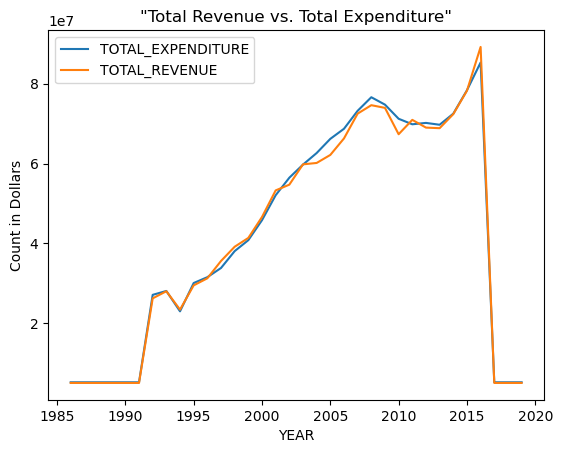

In [101]:
plt.figure(figsize=(5,3))
work_dataframe_1[work_dataframe_1['STATE']=='CALIFORNIA'] \
    [['TOTAL_EXPENDITURE', 'TOTAL_REVENUE']].\
    plot(kind='line', xlabel='YEAR', ylabel='Count in Dollars',
         title='"Total Revenue vs. Total Expenditure"' )

<AxesSubplot:title={'center':'"Total Revenue vs. Total Expenditure"'}, xlabel='YEAR', ylabel='Count in Dollars'>

<Figure size 500x300 with 0 Axes>

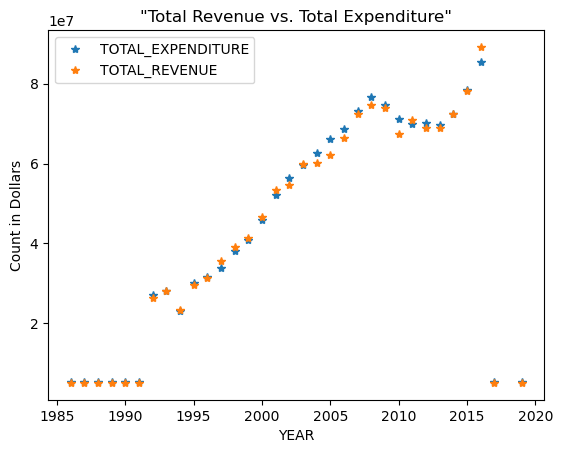

In [102]:
plt.figure(figsize=(5,3))
work_dataframe_1[work_dataframe_1['STATE']=='CALIFORNIA'] \
    [['TOTAL_EXPENDITURE', 'TOTAL_REVENUE']].\
    plot(kind='line', xlabel='YEAR', ylabel='Count in Dollars', style='*',
         title='"Total Revenue vs. Total Expenditure"' )

Analysis of Data

The reason for the drop from about 2016 to 2019 is unknown.  It is to eary to for COVID
to have happend.  Also, the recession 2007 to 2009 we had the recession so the decrease
revenue is understanable

extra homework : Analyzse the outliers fo the above columns.

## In California, which lessons are students more successful: math or reading?

In [120]:
data_frame_2 = data_frame_1[["STATE", "AVG_MATH_4_SCORE","AVG_MATH_8_SCORE", "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"]]
data_frame_2.head()

,STATE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,ALABAMA,208.0,252.0,207.0,265.0
1,ALASKA,238.0,280.5,220.0,265.0
2,ARIZONA,215.0,265.0,209.0,265.0
3,ARKANSAS,210.0,256.0,211.0,265.0
4,CALIFORNIA,208.0,261.0,202.0,265.0


In [121]:
data_frame_2.describe()

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1715.000000,1715.000000,1715.000000
mean,237.448980,279.720991,219.547522,264.527697
std,5.384205,6.215863,4.762313,3.843150
min,192.000000,231.000000,179.000000,236.000000
25%,238.000000,280.500000,220.000000,265.000000
50%,238.000000,280.500000,220.000000,265.000000
75%,238.000000,280.500000,220.000000,265.000000
max,253.000000,301.000000,237.000000,280.000000


### Analysis

For this question the average is being compared.  You can look at the mean, 50%(median)
The students are better at math.  

## What are the distributions 

of the math and reading scores in the sample?


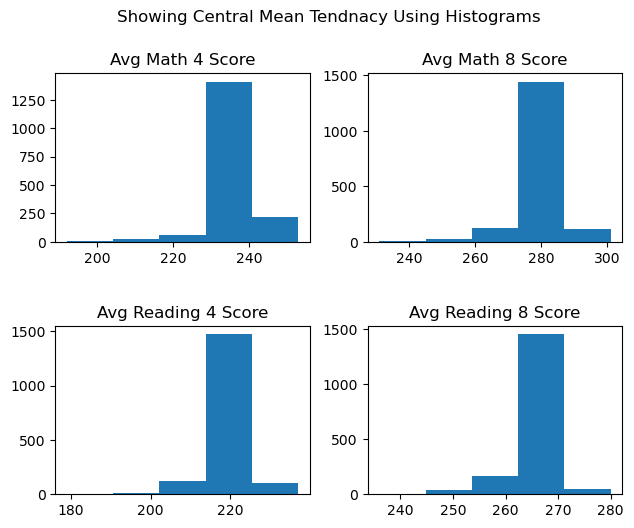

In [123]:
import numpy.random as rand
import numpy as np

fig, ax = plt.subplots(2,2)
fig.tight_layout()
ax[0][0].set_title("Avg Math 4 Score")
ax[0][1].set_title("Avg Math 8 Score")
ax[1][0].set_title("Avg Reading 4 Score")
ax[1][1].set_title("Avg Reading 8 Score")
fig.suptitle("Showing Central Mean Tendnacy Using Histograms", y=1.09)
plt.subplots_adjust(hspace=.5)
        
ax[0][0].hist(data_frame_2['AVG_MATH_4_SCORE'], bins=5)
ax[0][1].hist(data_frame_2['AVG_MATH_8_SCORE'], bins=5)
ax[1][0].hist(data_frame_2['AVG_READING_4_SCORE'], bins=5)
ax[1][1].hist(data_frame_2['AVG_READING_8_SCORE'], bins=5)
plt.show()

In [124]:
data_frame_2

,STATE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,ALABAMA,208.0,252.0,207.0,265.0
1,ALASKA,238.0,280.5,220.0,265.0
2,ARIZONA,215.0,265.0,209.0,265.0
3,ARKANSAS,210.0,256.0,211.0,265.0
4,CALIFORNIA,208.0,261.0,202.0,265.0
...,...,...,...,...,...
1710,VIRGINIA,247.0,287.0,224.0,262.0
1711,WASHINGTON,240.0,286.0,220.0,266.0
1712,WEST_VIRGINIA,231.0,272.0,213.0,256.0
1713,WISCONSIN,242.0,289.0,220.0,267.0


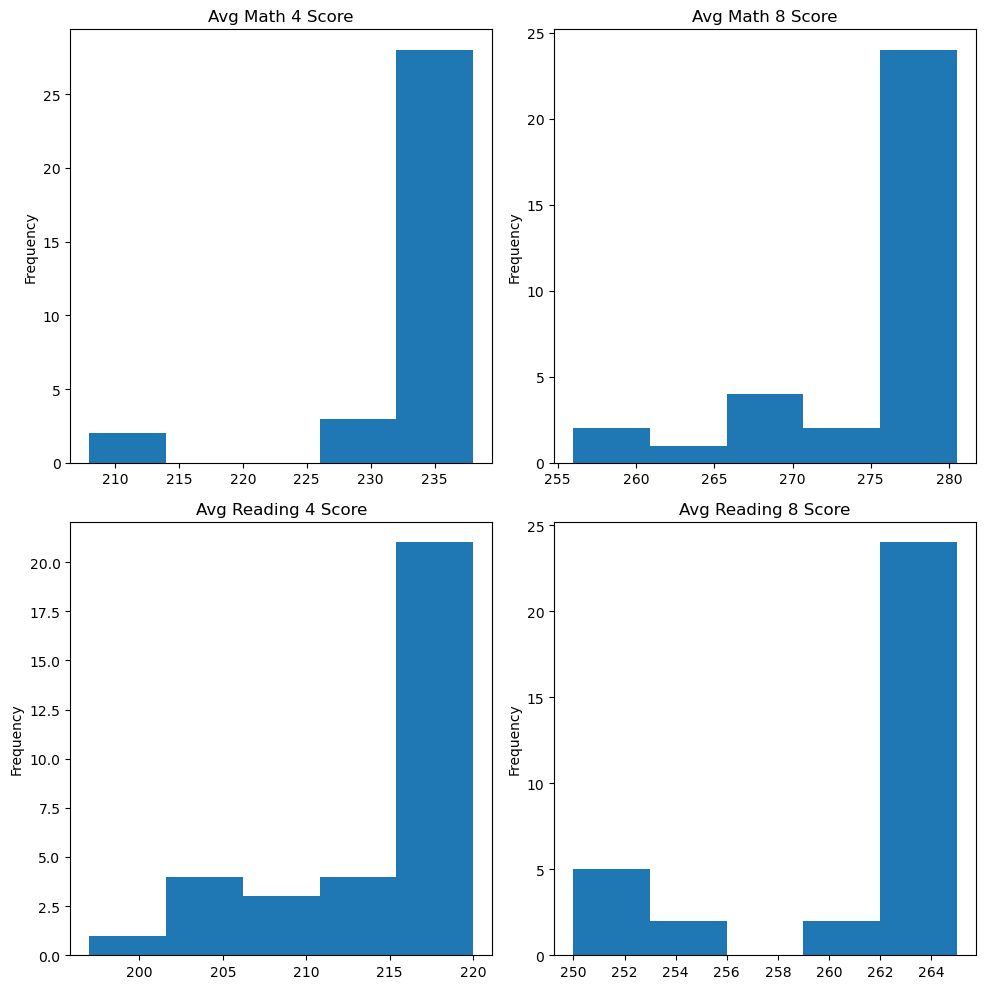

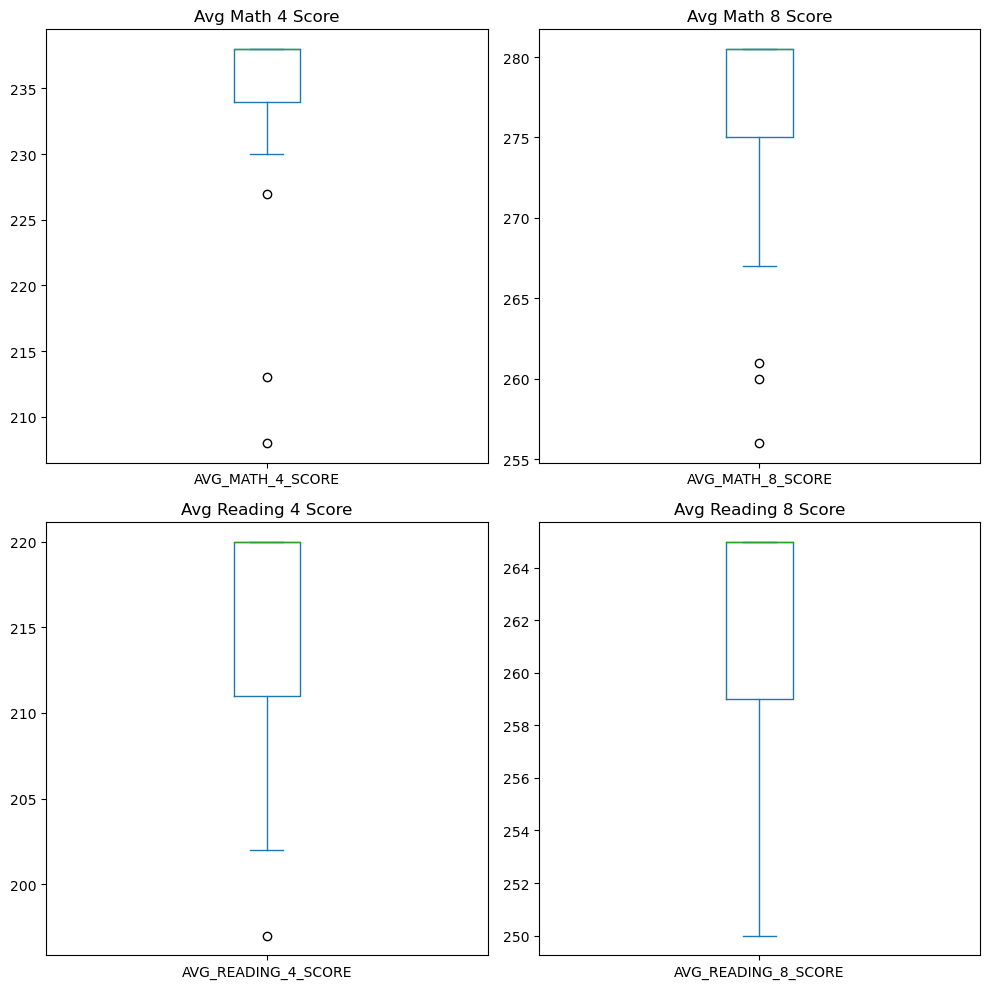

In [149]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
state = data_frame_2[data_frame_2['STATE'] == 'CALIFORNIA']

state['AVG_MATH_4_SCORE'].plot(kind='box', ax=ax[0,0])
state['AVG_MATH_8_SCORE'].plot(kind='box', ax=ax[0,1])
state['AVG_READING_4_SCORE'].plot(kind='box', ax=ax[1,0])
state['AVG_READING_8_SCORE'].plot(kind='box', ax=ax[1,1])

ax[0][0].set_title("Avg Math 4 Score")
ax[0][1].set_title("Avg Math 8 Score")
ax[1][0].set_title("Avg Reading 4 Score")
ax[1][1].set_title("Avg Reading 8 Score")

plt.tight_layout()
plt.show()
             

## Now, look again at the original dataset 

(before you filled in the missing values). Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then, compare the effects of these techniques on the distributions of the score variables.


In [163]:
data_frame_3 = pd.read_csv('states_all.csv')

In [164]:
"Number of missing values " + str(data_frame_3.isna().sum().sum())
data_frame_3 = data_frame_3[["STATE","AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE", "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"]]
data_frame_3

,STATE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,ALABAMA,208.0,252.0,207.0,NaN
1,ALASKA,NaN,NaN,NaN,NaN
2,ARIZONA,215.0,265.0,209.0,NaN
3,ARKANSAS,210.0,256.0,211.0,NaN
4,CALIFORNIA,208.0,261.0,202.0,NaN
...,...,...,...,...,...
1710,VIRGINIA,247.0,287.0,224.0,262.0
1711,WASHINGTON,240.0,286.0,220.0,266.0
1712,WEST_VIRGINIA,231.0,272.0,213.0,256.0
1713,WISCONSIN,242.0,289.0,220.0,267.0


In [165]:
# fill in missing values 
data_fix_using_missing_mean = data_frame_3.copy(deep=True)
data_fix_using_missing_mean.fillna(data_fix_using_missing_mean.mean(), inplace=True)
print("Number of missing values " + str(data_fix_using_missing_mean.isna().sum().sum()))
data_fix_using_missing_mean

Number of missing values 0


/var/folders/1c/tyj7zpyn45bc8g5c1h6mz2s00000gn/T/ipykernel_22734/2987709052.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_fix_using_missing_mean.fillna(data_fix_using_missing_mean.mean(), inplace=True)


,STATE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,ALABAMA,208.000000,252.000000,207.000000,263.558719
1,ALASKA,236.327434,278.280731,218.806154,263.558719
2,ARIZONA,215.000000,265.000000,209.000000,263.558719
3,ARKANSAS,210.000000,256.000000,211.000000,263.558719
4,CALIFORNIA,208.000000,261.000000,202.000000,263.558719
...,...,...,...,...,...
1710,VIRGINIA,247.000000,287.000000,224.000000,262.000000
1711,WASHINGTON,240.000000,286.000000,220.000000,266.000000
1712,WEST_VIRGINIA,231.000000,272.000000,213.000000,256.000000
1713,WISCONSIN,242.000000,289.000000,220.000000,267.000000


In [166]:
# data fill in missing values using media
data_fix_using_median = data_frame_3.copy(deep=True)
data_fix_using_median.fillna(data_fix_using_median.median(), inplace=True)
print("Number of missing values " + str(data_fix_using_median.isna().sum().sum()))
data_fix_using_median

Number of missing values 0


/var/folders/1c/tyj7zpyn45bc8g5c1h6mz2s00000gn/T/ipykernel_22734/2328575228.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_fix_using_median.fillna(data_fix_using_median.median(), inplace=True)


,STATE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,ALABAMA,208.0,252.0,207.0,265.0
1,ALASKA,238.0,280.5,220.0,265.0
2,ARIZONA,215.0,265.0,209.0,265.0
3,ARKANSAS,210.0,256.0,211.0,265.0
4,CALIFORNIA,208.0,261.0,202.0,265.0
...,...,...,...,...,...
1710,VIRGINIA,247.0,287.0,224.0,262.0
1711,WASHINGTON,240.0,286.0,220.0,266.0
1712,WEST_VIRGINIA,231.0,272.0,213.0,256.0
1713,WISCONSIN,242.0,289.0,220.0,267.0


In [167]:
data_fix_using_interpolate = data_frame_3.copy(deep=True)
data_fix_using_interpolate = data_fix_using_interpolate.interpolate(limit_direction='both')
"Number of missing values " + str(data_fix_using_interpolate.isna().sum().sum())
data_fix_using_interpolate

,STATE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,ALABAMA,208.0,252.0,207.0,255.0
1,ALASKA,211.5,258.5,208.0,255.0
2,ARIZONA,215.0,265.0,209.0,255.0
3,ARKANSAS,210.0,256.0,211.0,255.0
4,CALIFORNIA,208.0,261.0,202.0,255.0
...,...,...,...,...,...
1710,VIRGINIA,247.0,287.0,224.0,262.0
1711,WASHINGTON,240.0,286.0,220.0,266.0
1712,WEST_VIRGINIA,231.0,272.0,213.0,256.0
1713,WISCONSIN,242.0,289.0,220.0,267.0


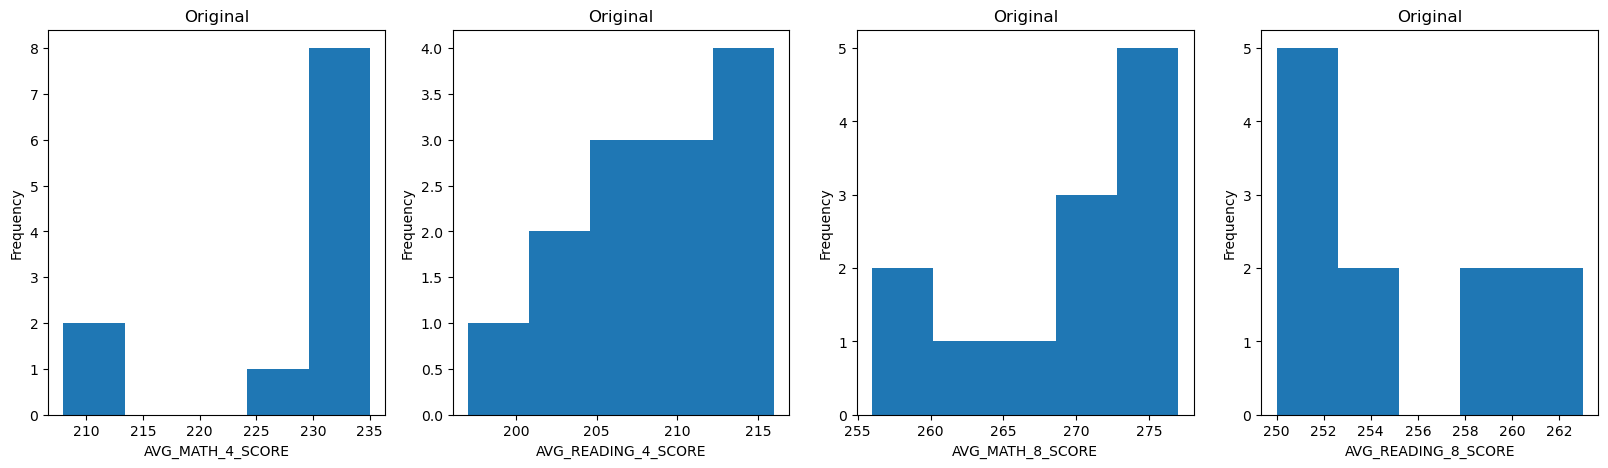

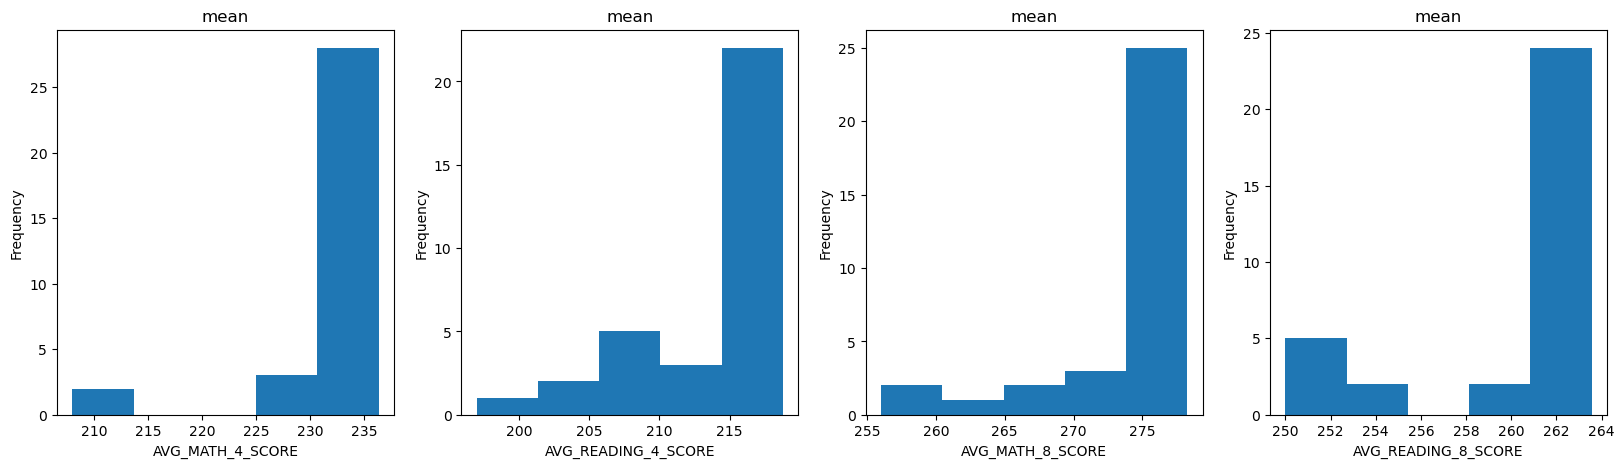

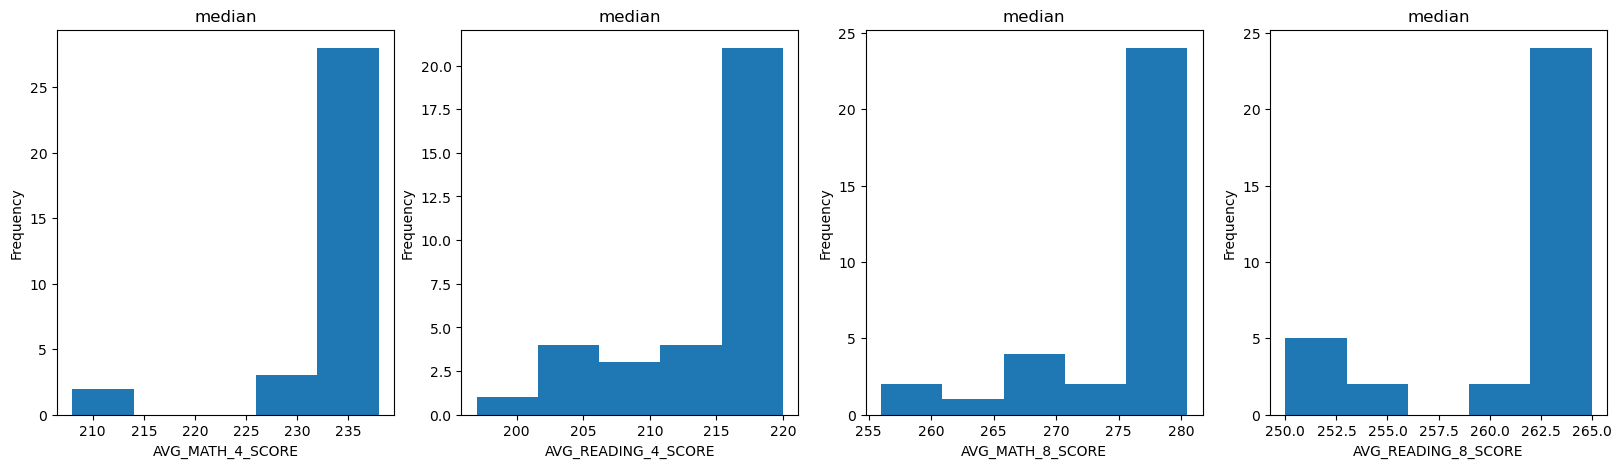

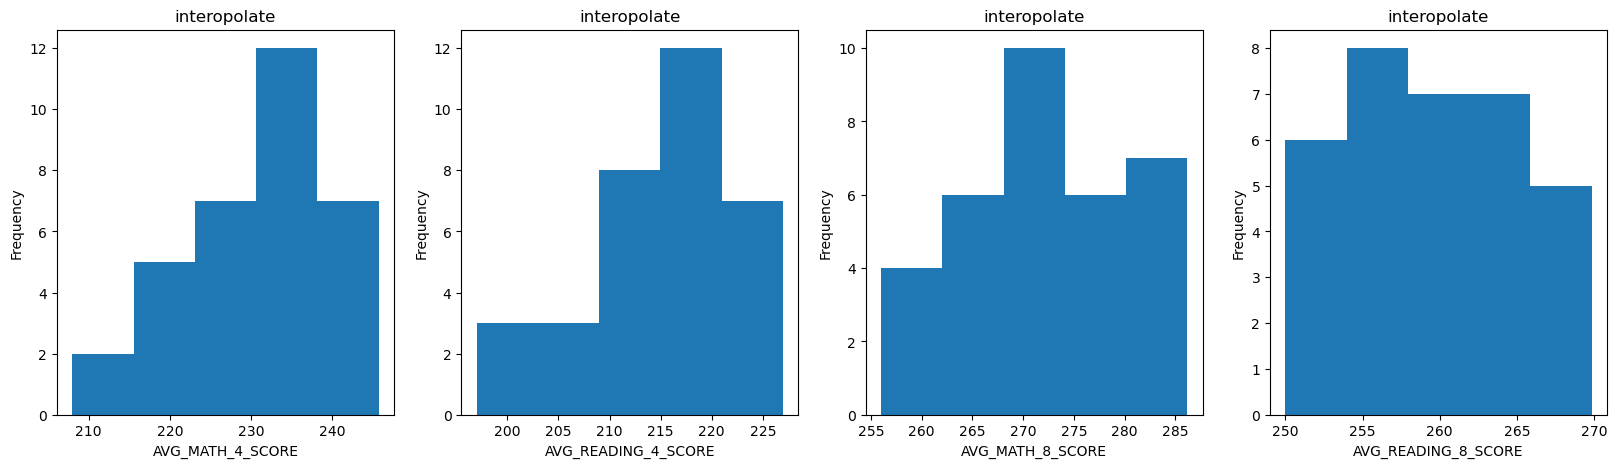

In [175]:
def dist_visualizatoin(df,title,state,cols):
    
        fig,ax = plt.subplots(1,4,figsize=(20,5))
        index=0
        for i in cols:
            df[df['STATE'] == state][i].plot(kind='hist', bins=5, ax=ax[index])
            ax[index].set_xlabel(i)
            ax[index].set_title(title)
            index+=1

cols=['AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE','AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE']
state='CALIFORNIA'

dist_visualizatoin(data_frame_3, title='Original', state=state, cols=cols)
dist_visualizatoin(data_fix_using_missing_mean, title='mean', state=state, cols=cols)
dist_visualizatoin(data_fix_using_median, title='median', state=state, cols=cols )
dist_visualizatoin(data_fix_using_interpolate, title='interopolate', state=state, cols=cols )

# How have the methods changed the characteristics

Don't forget median is 50% in the describe

1. From the orignal to the mean or median the frequency has change from 8 to 25.  The distribution is not changed just increasing the majority of the values.  Compared to the original data the majority is still in the same range, but reading 8 score the major is in a different range.  We have to see how this change is in the real scenoria.  Is there a huge difference 

2. Interopolation is changing the distribution of the data.  It is not a good method and is good when you don't have too many missing values and they are fewer and scattered

Would choose median since it is not affected by the median

The range 250,260 could be considerable since the mean is 230, but need to discuss with the SME